In [1]:
import pickle

data_save = r"C:\Users\user\Desktop\MasterThesis\opm-thesis\data\data_nottingham_preprocessed\epochs"
frequency_band = [
    "alpha",
    "beta",
    "low_gamma",
    "low_mid_gamma",
    "mid_gamma",
    "high_gamma",
    "all_gamma",
]
decimate = True

with open(data_save + "\\hilbert_" + frequency_band[0] + "_all_epochs.pkl", "rb") as f:
  alpha = pickle.load(f)

with open(data_save + "\\hilbert_" + frequency_band[2] + "_all_epochs.pkl", "rb") as f:
  low_gamma = pickle.load(f)

with open(data_save + "\\all_epochs.pkl", "rb") as f:
  epochs = pickle.load(f)

In [2]:
# Compute Pearson correlation coefficient between alpha and low gamma
import scipy.stats as stats

corr, _ = stats.pearsonr(alpha.get_data()[:, 0, 0], low_gamma.get_data()[:, 0, 0])

import mne
picks = mne.pick_types(alpha.info, meg=True, exclude="bads")


ValueError: This function does not support complex data

In [ ]:
from mne.decoding import Scaler

scaler = Scaler(scalings='mean')
alpha_data = scaler.fit_transform(alpha.get_data())[:, picks, :]
low_gamma_data = scaler.fit_transform(low_gamma.get_data())[:, picks, :]
epochs = scaler.fit_transform(epochs.get_data())[:, picks, :]

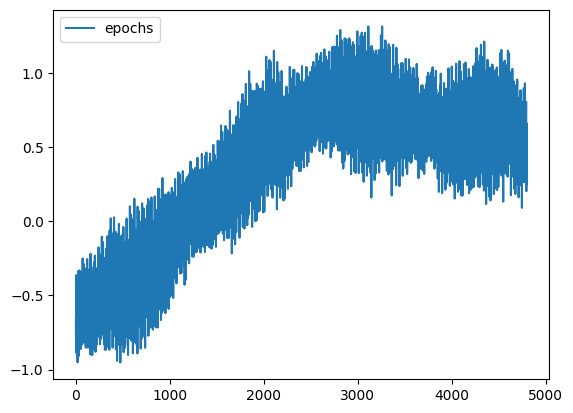

In [ ]:
from matplotlib import pyplot as plt

# Plot both signals
# plt.plot(low_gamma_data[1, 25, :], label="low gamma")
plt.plot(epochs[1, 25, :], label="epochs")
plt.legend()
plt.show()


In [ ]:
acq_times = ["155445", "160513", "161344", "163001"]
low_gamma = dict({"l_freq": 30, "h_freq": 60})

frequencies = { 
    "low_gamma": low_gamma,
}
for key, frequency_params in frequencies.items():
    preprocessed_epochs = list()
    for i in range(4):
        preprocessing = pickle.load(
            open(data_save + "\\preprocessing_" + acq_times[i] + ".pkl", "rb")
        )
        raw_filtered = preprocessing.apply_filters(
            preprocessing.raw, frequency_params, notch_filter=False,
        )
        picks = mne.pick_types(raw_filtered.info, meg="mag", exclude="bads")
        hilbert_transformed = raw_filtered.copy().apply_hilbert(picks=picks)
        hilbert_epochs = preprocessing.create_epochs(hilbert_transformed)